In [3]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral) 
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    

def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

def load_extra_datasets():  
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)
    
    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure

In [4]:
import numpy as np

def layer_sizes_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(5, 3)
    Y_assess = np.random.randn(2, 3)
    return X_assess, Y_assess

def initialize_parameters_test_case():
    n_x, n_h, n_y = 2, 4, 1
    return n_x, n_h, n_y

def forward_propagation_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(2, 3)

    parameters = {'W1': np.array([[-0.00416758, -0.00056267],
        [-0.02136196,  0.01640271],
        [-0.01793436, -0.00841747],
        [ 0.00502881, -0.01245288]]),
     'W2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
     'b1': np.array([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]),
     'b2': np.array([[ 0.]])}

    return X_assess, parameters

def compute_cost_test_case():
    np.random.seed(1)
    Y_assess = np.random.randn(1, 3)
    parameters = {'W1': np.array([[-0.00416758, -0.00056267],
        [-0.02136196,  0.01640271],
        [-0.01793436, -0.00841747],
        [ 0.00502881, -0.01245288]]),
     'W2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
     'b1': np.array([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]),
     'b2': np.array([[ 0.]])}

    a2 = (np.array([[ 0.5002307 ,  0.49985831,  0.50023963]]))
    
    return a2, Y_assess, parameters

def backward_propagation_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(2, 3)
    Y_assess = np.random.randn(1, 3)
    parameters = {'W1': np.array([[-0.00416758, -0.00056267],
        [-0.02136196,  0.01640271],
        [-0.01793436, -0.00841747],
        [ 0.00502881, -0.01245288]]),
     'W2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
     'b1': np.array([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]),
     'b2': np.array([[ 0.]])}

    cache = {'A1': np.array([[-0.00616578,  0.0020626 ,  0.00349619],
         [-0.05225116,  0.02725659, -0.02646251],
         [-0.02009721,  0.0036869 ,  0.02883756],
         [ 0.02152675, -0.01385234,  0.02599885]]),
  'A2': np.array([[ 0.5002307 ,  0.49985831,  0.50023963]]),
  'Z1': np.array([[-0.00616586,  0.0020626 ,  0.0034962 ],
         [-0.05229879,  0.02726335, -0.02646869],
         [-0.02009991,  0.00368692,  0.02884556],
         [ 0.02153007, -0.01385322,  0.02600471]]),
  'Z2': np.array([[ 0.00092281, -0.00056678,  0.00095853]])}
    return parameters, cache, X_assess, Y_assess

def update_parameters_test_case():
    parameters = {'W1': np.array([[-0.00615039,  0.0169021 ],
        [-0.02311792,  0.03137121],
        [-0.0169217 , -0.01752545],
        [ 0.00935436, -0.05018221]]),
 'W2': np.array([[-0.0104319 , -0.04019007,  0.01607211,  0.04440255]]),
 'b1': np.array([[ -8.97523455e-07],
        [  8.15562092e-06],
        [  6.04810633e-07],
        [ -2.54560700e-06]]),
 'b2': np.array([[  9.14954378e-05]])}

    grads = {'dW1': np.array([[ 0.00023322, -0.00205423],
        [ 0.00082222, -0.00700776],
        [-0.00031831,  0.0028636 ],
        [-0.00092857,  0.00809933]]),
 'dW2': np.array([[ -1.75740039e-05,   3.70231337e-03,  -1.25683095e-03,
          -2.55715317e-03]]),
 'db1': np.array([[  1.05570087e-07],
        [ -3.81814487e-06],
        [ -1.90155145e-07],
        [  5.46467802e-07]]),
 'db2': np.array([[ -1.08923140e-05]])}
    return parameters, grads

def nn_model_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(2, 3)
    Y_assess = np.random.randn(1, 3)
    return X_assess, Y_assess

def predict_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(2, 3)
    parameters = {'W1': np.array([[-0.00615039,  0.0169021 ],
        [-0.02311792,  0.03137121],
        [-0.0169217 , -0.01752545],
        [ 0.00935436, -0.05018221]]),
     'W2': np.array([[-0.0104319 , -0.04019007,  0.01607211,  0.04440255]]),
     'b1': np.array([[ -8.97523455e-07],
        [  8.15562092e-06],
        [  6.04810633e-07],
        [ -2.54560700e-06]]),
     'b2': np.array([[  9.14954378e-05]])}
    return parameters, X_assess

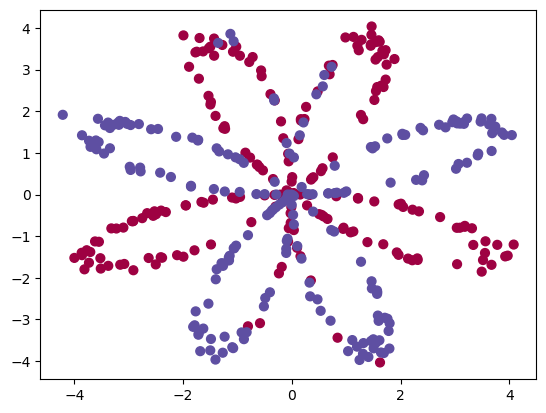

In [5]:
# Импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

%matplotlib inline

np.random.seed(1) # задано значение seed, чтобы результаты были воспроизводимы
X, Y = load_planar_dataset()
# Визуализируем данные:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

In [6]:
shape_X = X.shape
shape_Y = Y.shape
m = X.shape[1]

print ('Размерность X: ' + str(shape_X))
print ('Размерность Y: ' + str(shape_Y))
print ('Всего m = %d тренировочных примеров!' % (m))

Размерность X: (2, 400)
Размерность Y: (1, 400)
Всего m = 400 тренировочных примеров!


C:\Users\salmi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Точность логистической регрессии: 47 % (процент правильно размеченных точек данных)


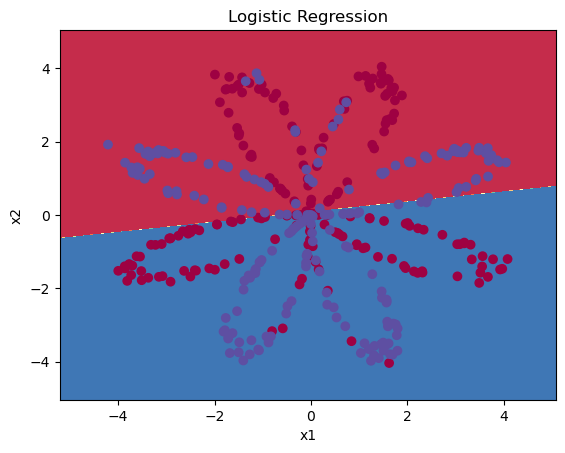

In [7]:
# Обучаем классификатор логистической регрессии
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.T)
# строим график
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Выводим accuracy
LR_predictions = clf.predict(X.T)
print ('Точность логистической регрессии: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(процент правильно размеченных точек данных)")

In [8]:
def layer_sizes(X, Y):
    """
    Аргументы:
    X -- входной датасет размерностью (input size, количество элементов)
    Y -- labels размерностью (output size, количество элементов)
    
    Возвращает:
    n_x -- размер входного слоя
    n_h -- размер скрытого слоя
    n_y -- размер выходного слоя
    """
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    return (n_x, n_h, n_y)
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("Размер входного слоя: n_x = " + str(n_x))
print("Размер скрытого слоя: n_h = " + str(n_h))
print("Размер выходного слоя: n_y = " + str(n_y))


Размер входного слоя: n_x = 5
Размер скрытого слоя: n_h = 4
Размер выходного слоя: n_y = 2


In [9]:
Y_assess.shape

(2, 3)

In [11]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Аргументы:
    n_x -- размер входного слоя
    n_h -- размер скрытого слоя
    n_y -- размер выходного слоя
    
    Возвращает:
    params -- словарь, содержащий ваши параметры:
                    W1 -- матрицу весов размерностью (n_h, n_x)
                    b1 -- свободные члены (bias vector) размерностью (n_h, 1)
                    W2 -- матрицу весов размерностью (n_y, n_h)
                    b2 -- свободные члены (bias vector) размерностью (n_y, 1)
    """
    
    np.random.seed(2) # мы настраиваем начальное число так, чтобы ваш результат соответствовал нашему, хотя инициализация является случайной.
    
    ### Начало кода ### (≈ 4 строчки)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    ### Конец кода ###
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


In [13]:
# функция forward_propagation

def forward_propagation(X, parameters):
    """
    Аргументы:
    X -- входные данные размерностью (n_x, m)
    parameters -- словарь, содержащий ваши параметры (результат функции инициализации)
    
    Возвращает:
    A2 -- Выход второго слоя
    cache -- словарь содержащий "Z1", "A1", "Z2" и "A2"
    """
    # Получить каждый параметр из словаря parameters
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Реализуйте прямое распространение, чтобы вычислить A2 (вероятности)

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache
X_assess, parameters = forward_propagation_test_case()

A2, cache = forward_propagation(X_assess, parameters)

# Примечание. Здесь мы используем среднее значение, чтобы убедиться, что результат соответствует ожидаемому. 
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

-0.0004997557777419902 -0.000496963353231779 0.00043818745095914653 0.500109546852431


In [14]:
def compute_cost(A2, Y, parameters):

    m = Y.shape[1] # количество элементов

    # Compute the cross-entropy cost

    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), 1 - Y)
    cost = -np.sum(logprobs) / m
    
    cost = np.squeeze(cost)     # гарантирует, что стоимость соответствует ожидаемому размеру. 

    assert(isinstance(cost, float))
    
    return cost

A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.6929198937761266


In [15]:
def backward_propagation(parameters, cache, X, Y):

    m = X.shape[1]
    
    # Сначала извлеките W1 и W2 из словаря parameters.

    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    # Извлеките A1 и A2 из словаря cache.

    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # Обратное распространение: вычислите dW1, db1, dW2, db2. 

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()
print(parameters['W1'].shape)
print(parameters['W2'].shape)
print(X_assess.shape)
print(Y_assess.shape)

(4, 2)
(1, 4)
(2, 3)
(1, 3)


In [16]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.01018708 -0.00708701]
 [ 0.00873447 -0.0060768 ]
 [-0.00530847  0.00369379]
 [-0.02206365  0.01535126]]
db1 = [[-0.00069728]
 [-0.00060606]
 [ 0.000364  ]
 [ 0.00151207]]
dW2 = [[ 0.00363613  0.03153604  0.01162914 -0.01318316]]
db2 = [[0.06589489]]


In [17]:
def update_parameters(parameters, grads, learning_rate = 1.2):

    # Получите каждый параметр из словаря parameters.

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Получите каждый градиент из словаря grads.

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    # Обновите значения для каждого параментра

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


In [19]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Инициализируйте параметры, затем извлеките W1, b1, W2, b2. Входные данные: «n_x, n_h, n_y». Выходы = «W1, b1, W2, b2, параметры».

    n_x, n_h, n_y = layer_sizes(X, Y)
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Цикл (градиентный спуск)

    for i in range(0, num_iterations):
         
        # Прямое распространение. Входные параметры: "X, parameters". Выходные параметры: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Функция стоимости. Входные параметры: "A2, Y, parameters". Выходные параметры: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Обратное распространение. Входные параметры: "parameters, cache, X, Y". Выходные параметры: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Обновление параметра градиентного спуска. Входные параметры: "parameters, grads". Выходные параметры: "parameters".
        parameters = update_parameters(parameters, grads)
        
        # Выводит cost каждые 1000 итераций
        if print_cost and i % 1000 == 0:
            print ("Стоимость после итераций %i: %f" %(i, cost))

    return parameters
X_assess, Y_assess = nn_model_test_case()

parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=False)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

C:\Users\salmi\AppData\Local\Temp\ipykernel_57432\3248617250.py:7: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), 1 - Y)
C:\Users\salmi\AppData\Local\Temp\ipykernel_57432\756290347.py:34: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-x))


W1 = [[-4.18490516  5.33208784]
 [-7.53808225  1.20752902]
 [-4.19252079  5.32644889]
 [ 7.5380719  -1.2075345 ]]
b1 = [[ 2.32937885]
 [ 3.80992836]
 [ 2.33016691]
 [-3.80994106]]
W2 = [[-6033.82330742 -6008.14269598 -6033.08752631  6008.07902759]]
b2 = [[-52.67947274]]


In [21]:
def predict(parameters, X):

    # Вычисляет вероятности, используя прямое распространение, и классифицирует их как 0/1, используя 0,5 в качестве порога.

    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5).astype(int)
    
    return predictions
a = np.array([[0,2,1,3,5,7,6,5]])
b = np.array([1  if x>3 else 0  for x  in a.reshape(-1,1)])
b = b.reshape(a.shape)


parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("Среднее предсказаний = " + str(np.mean(predictions)))

Среднее предсказаний = 0.6666666666666666


Стоимость после итераций 0: 0.693048
Стоимость после итераций 1000: 0.288083
Стоимость после итераций 2000: 0.254385


Text(0.5, 1.0, 'Граница решения для скрытого слоя размера 4')

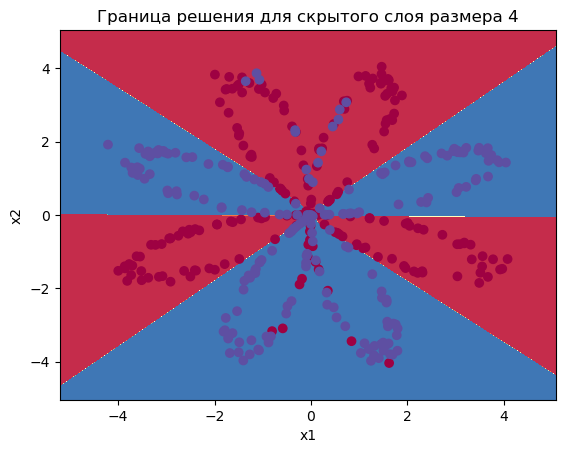

In [25]:
# Создайте модель с n_h-мерным скрытым слоем.
parameters = nn_model(X, Y, n_h=4, num_iterations=3000, print_cost=True)

# Строим график
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Граница решения для скрытого слоя размера " + str(4))

In [26]:
# Выводим accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 90%


Точность для 1 скрытых нейронов: 90.5 %
Точность для 2 скрытых нейронов: 90.5 %
Точность для 3 скрытых нейронов: 90.5 %
Точность для 4 скрытых нейронов: 90.5 %
Точность для 5 скрытых нейронов: 90.5 %
Точность для 20 скрытых нейронов: 90.5 %
Точность для 50 скрытых нейронов: 90.5 %


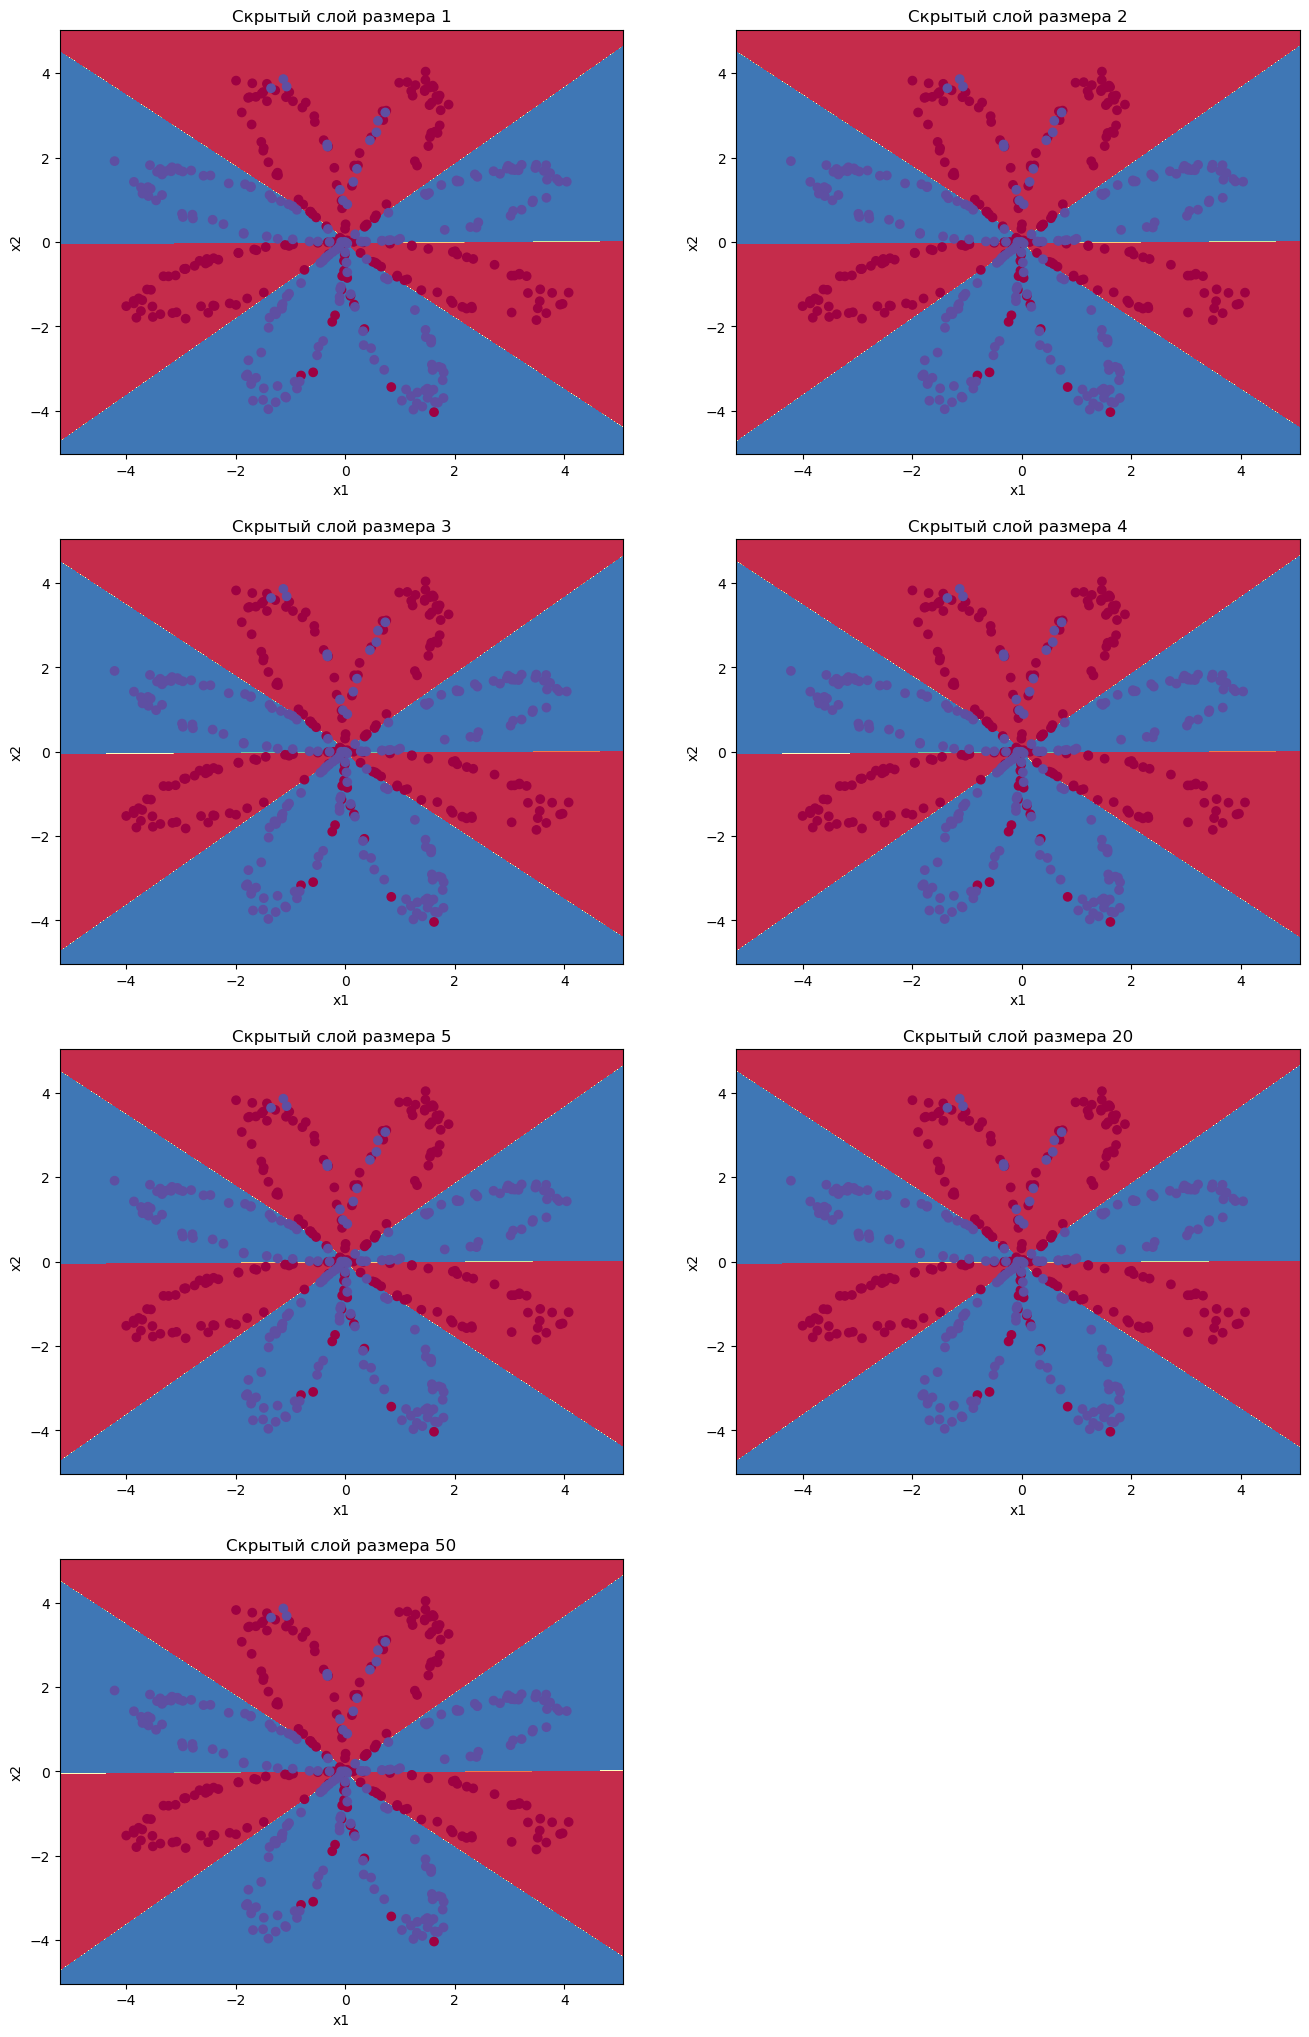

In [27]:
# Это может занять около 2 минут.

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Скрытый слой размера %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Точность для {} скрытых нейронов: {} %".format(n_h, accuracy))